1. Importação das bibliotecas e configuração inicial

In [5]:
import os
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Configurar o caminho do dataset
DATASET_PATH = "/home/guilherme/Documentos/Dataset's/WaterMeters"
CSV_FILE = os.path.join(DATASET_PATH, "data.csv")
IMAGES_FOLDER = os.path.join(DATASET_PATH, "images")
MASKS_FOLDER = os.path.join(DATASET_PATH, "masks")
COLLAGE_FOLDER = os.path.join(DATASET_PATH, "collage")


2. Carregar o arquivo CSV

In [6]:
# Carregar o arquivo CSV com informações das imagens
data = pd.read_csv(CSV_FILE)

# Visualizar as primeiras linhas
print(data.head())

# Verificar estatísticas do dataset
print(data.info())


                 photo_name    value  \
0   id_53_value_595_825.jpg  595.825   
1   id_553_value_65_475.jpg   65.475   
2    id_407_value_21_86.jpg   21.860   
3  id_252_value_313_322.jpg  313.322   
4  id_851_value_305_162.jpg  305.162   

                                            location  
0  {'type': 'polygon', 'data': [{'x': 0.30788, 'y...  
1  {'type': 'polygon', 'data': [{'x': 0.26133, 'y...  
2  {'type': 'polygon', 'data': [{'x': 0.27545, 'y...  
3  {'type': 'polygon', 'data': [{'x': 0.21967, 'y...  
4  {'type': 'polygon', 'data': [{'x': 0.06983, 'y...  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1244 entries, 0 to 1243
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   photo_name  1244 non-null   object 
 1   value       1244 non-null   float64
 2   location    1244 non-null   object 
dtypes: float64(1), object(2)
memory usage: 29.3+ KB
None


3. Visualização inicial dos dados

[ WARN:0@781.195] global loadsave.cpp:241 findDecoder imread_('/home/guilherme/Documentos/Dataset's/WaterMeters/masks/id_53_value_595_825_mask.jpg'): can't open/read file: check file path/integrity


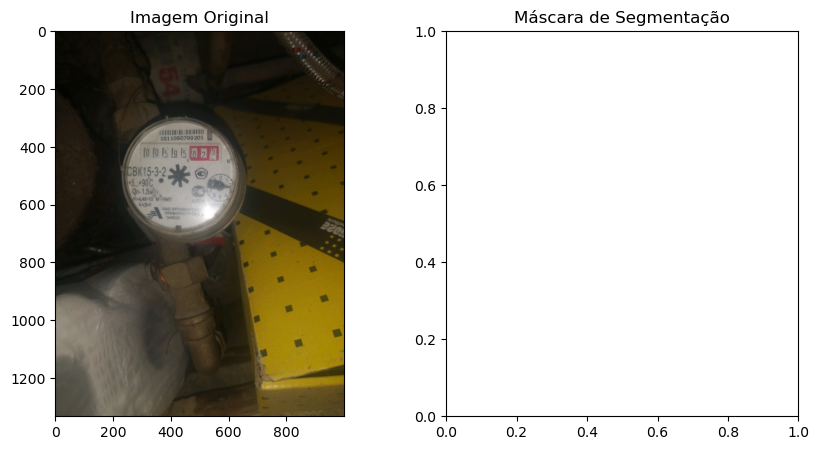

In [13]:
# Carregar e exibir uma amostra de imagem, máscara e bounding box
sample_image_name = data.iloc[0]['photo_name']   
image_path = os.path.join(IMAGES_FOLDER, sample_image_name)
mask_path = os.path.join(MASKS_FOLDER, sample_image_name.replace('.jpg', '_mask.jpg'))

# Carregar imagem e máscara
image = cv2.imread(image_path)
mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)

# Exibir imagem e máscara
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
ax[0].set_title('Imagem Original')

ax[1].set_title('Máscara de Segmentação')
plt.show()


4. Extração das informações de Bounding boxes

In [26]:
# Verificar colunas relacionadas ao bounding box
print(data[['photo_name', 'value', 'location']].head())

# Exemplo de como interpretar a localização
# Supondo que 'location' contenha as coordenadas (x_min, y_min, x_max, y_max)
def convert_location(loc):
	if isinstance(loc, str):
		return eval(loc)
	return loc

data['location'] = data['location'].apply(convert_location)  # Converter string para lista/tupla se necessário
sample_bbox = data.iloc[0]['location']
print("Exemplo de bounding box:", sample_bbox)

# Verificar se a bounding box tem 4 valores
if len(sample_bbox) == 4:
	x_min, y_min, x_max, y_max = sample_bbox
	image_with_bbox = image.copy()
	cv2.rectangle(image_with_bbox, (x_min, y_min), (x_max, y_max), (255, 0, 0), 2)

	plt.imshow(cv2.cvtColor(image_with_bbox, cv2.COLOR_BGR2RGB))
	plt.title("Imagem com Bounding Box")
	plt.show()
else:
	print("Bounding box não contém 4 valores:", sample_bbox)


                 photo_name    value  \
0   id_53_value_595_825.jpg  595.825   
1   id_553_value_65_475.jpg   65.475   
2    id_407_value_21_86.jpg   21.860   
3  id_252_value_313_322.jpg  313.322   
4  id_851_value_305_162.jpg  305.162   

                                            location  
0  {'type': 'polygon', 'data': [{'x': 0.30788, 'y...  
1  {'type': 'polygon', 'data': [{'x': 0.26133, 'y...  
2  {'type': 'polygon', 'data': [{'x': 0.27545, 'y...  
3  {'type': 'polygon', 'data': [{'x': 0.21967, 'y...  
4  {'type': 'polygon', 'data': [{'x': 0.06983, 'y...  
Exemplo de bounding box: {'type': 'polygon', 'data': [{'x': 0.30788, 'y': 0.30207}, {'x': 0.30676, 'y': 0.32731}, {'x': 0.53501, 'y': 0.33068}, {'x': 0.53445, 'y': 0.33699}, {'x': 0.56529, 'y': 0.33741}, {'x': 0.56697, 'y': 0.29786}, {'x': 0.53501, 'y': 0.29786}, {'x': 0.53445, 'y': 0.30417}]}
Bounding box não contém 4 valores: {'type': 'polygon', 'data': [{'x': 0.30788, 'y': 0.30207}, {'x': 0.30676, 'y': 0.32731}, {'x': 0.53

5. Divisão do dataset

In [27]:
# Divisão em treino, validação e teste (usando a coluna 'value' como label)
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)
train_data, val_data = train_test_split(train_data, test_size=0.2, random_state=42)

# Verificar o tamanho dos conjuntos
print(f"Tamanho do conjunto de treino: {len(train_data)}")
print(f"Tamanho do conjunto de validação: {len(val_data)}")
print(f"Tamanho do conjunto de teste: {len(test_data)}")


Tamanho do conjunto de treino: 796
Tamanho do conjunto de validação: 199
Tamanho do conjunto de teste: 249


6. Preparação dos dados para modelos (exemplos com imagens redimencionadas)

In [31]:
# Função para carregar e redimensionar imagens e máscaras
def preprocess_image(image_path, mask_path=None, target_size=(512, 512)):
    image = cv2.imread(image_path)
    if image is None:
        raise FileNotFoundError(f"Image not found at path: {image_path}")
    image = cv2.resize(image, target_size)
    if mask_path:
        mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)
        if mask is None:
            raise FileNotFoundError(f"Mask not found at path: {mask_path}")
        mask = cv2.resize(mask, target_size)
        return image, mask
    return image

# Aplicar a função ao conjunto de treino
train_images = []
train_masks = []

for idx, row in train_data.iterrows():
    image_path = os.path.join(IMAGES_FOLDER, row['photo_name'])
    mask_path = os.path.join(MASKS_FOLDER, row['photo_name'].replace('.jpg', '_mask.jpg'))
    train_images.append(image)
    train_masks.append(mask)

# Converter para numpy arrays
X_train = np.array(train_images)
y_train = np.array(train_masks)
print(f"Formato dos dados de treino: {X_train.shape}, {y_train.shape}")


Formato dos dados de treino: (796, 1333, 1000, 3), (796,)


7. Visualização de pré-processamento

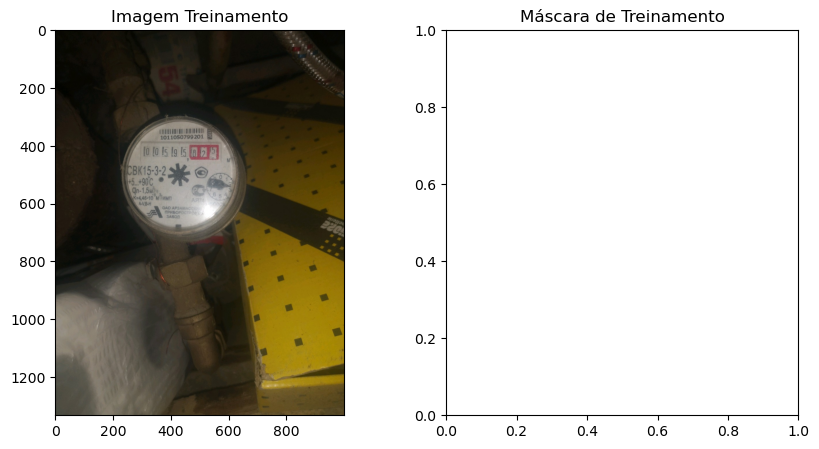

In [33]:
# Exibir uma amostra do conjunto de treino processado
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(X_train[0], cv2.COLOR_BGR2RGB))
plt.title("Imagem Treinamento")

plt.subplot(1, 2, 2)

plt.title("Máscara de Treinamento")
plt.show()
